In [52]:
#Numpy deals with large arrays and linear algebra
import numpy as np
# Library for data manipulation and analysis
import pandas as pd 
# graphing
from matplotlib import pyplot as plt
 
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score, accuracy_score, precision_score
 
#Importing the Decision Tree from scikit-learn library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# For splitting of data into train and test set
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import os
import re
import json
import pickle

# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
fake_df = pd.read_json("../../data/fake/fake-data.json")
real_df = pd.read_json("../../data/fake/real-data.json")
df = pd.concat([fake_df,real_df])

In [6]:
y = df.isFake
X = df.drop(["isFake"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [7]:
X_test.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,369.133779,647.672241,20.846154,57.702341,0.926421,0.682274,0.448161,11.070234
std,344.570293,828.622573,31.591931,110.422078,0.261522,0.466373,1.117203,2.837622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,154.500000,256.500000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000
50%,319.000000,454.000000,3.000000,20.000000,1.000000,1.000000,0.000000,11.000000
75%,471.500000,690.500000,32.000000,61.500000,1.000000,1.000000,0.000000,13.000000
max,3140.000000,7493.000000,150.000000,875.000000,1.000000,1.000000,7.000000,21.000000


In [18]:
# Training the model is as simple as this
# Use the function imported above and apply fit() on it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
# We use the predict() on the model to predict the output
pred=DT.predict(X_test)
 
# for classification we use accuracy and F1 score
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))
 

print(mean_absolute_error(y_test,pred))
print(mean_absolute_error(y_test,pred))


0.9531772575250836
0.8409090909090909
0.046822742474916385
0.046822742474916385


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# print("CONFUSION MATRIX:\n", confusion_matrix(y_test,pred))
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       258
           1       0.79      0.90      0.84        41

    accuracy                           0.95       299
   macro avg       0.89      0.93      0.91       299
weighted avg       0.96      0.95      0.95       299



In [9]:
def evaluate_using_model(class_, X_train,X_test,y_train,y_test):
    c = class_()
    c.fit(X_train,y_train)
    pred = c.predict(X_test)
    # for classification we use accuracy and F1 score
#     filename = f'./trained_models/{class_.__name__}_finalized_model.sav'
#     pickle.dump(c, open(filename, 'wb'))
    
    return accuracy_score(y_test,pred), f1_score(y_test,pred), precision_score(y_test,pred)

In [10]:
goodness = {}
classifiers = [
    RandomForestClassifier,
    DecisionTreeClassifier,
    #     LogisticRegression,
    SVC,
    GaussianNB,
    MultinomialNB,
    SGDClassifier,
    GradientBoostingClassifier,
]
for classifier in classifiers:
    accuracy, f1, precision = evaluate_using_model(
        classifier, X_train, X_test, y_train, y_test
    )
    goodness[classifier.__name__] = {
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
    }

In [11]:
df = pd.DataFrame(goodness).T
df.sort_values("accuracy", ascending=False)

,accuracy,f1,precision
RandomForestClassifier,0.963211,0.873563,0.950000
DecisionTreeClassifier,0.956522,0.853933,0.904762
GradientBoostingClassifier,0.956522,0.847059,0.947368
SGDClassifier,0.949833,0.827586,0.900000
MultinomialNB,0.946488,0.809524,0.918919
SVC,0.923077,0.693333,0.928571
GaussianNB,0.909699,0.703297,0.727273


In [49]:
list(df.columns)

['accuracy', 'f1', 'precision']

In [127]:
all_results = []
for scoring in ('accuracy', 'f1', 'precision', 'recall'):
    results = []
    names = []
    for classifier in classifiers:
        model = classifier()
        name = classifier.__name__
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = f"{name} {scoring}: {cv_results.mean()} ({cv_results.std()})"
        print(msg)
    all_results.append({"scoring": scoring, "names": names, "results": results})

RandomForestClassifier accuracy: 0.9155532212885154 (0.11474830793345497)
DecisionTreeClassifier accuracy: 0.9121778711484593 (0.11303455305727651)
SVC accuracy: 0.8964635854341738 (0.15961515563067918)
GaussianNB accuracy: 0.9138445378151261 (0.08840854367596283)
MultinomialNB accuracy: 0.9464425770308125 (0.0770213757907257)
SGDClassifier accuracy: 0.8111834733893557 (0.3125828124312333)
GradientBoostingClassifier accuracy: 0.9297619047619048 (0.09788959170694346)
RandomForestClassifier f1: 0.9113725490196078 (0.12030425574959074)
DecisionTreeClassifier f1: 0.9038165266106443 (0.12307065552185323)
SVC f1: 0.8964635854341738 (0.15961515563067918)
GaussianNB f1: 0.9138445378151261 (0.08840854367596283)
MultinomialNB f1: 0.9464425770308125 (0.0770213757907257)
SGDClassifier f1: 0.9298529411764707 (0.10689944178116177)
GradientBoostingClassifier f1: 0.930595238095238 (0.09681091014592443)
RandomForestClassifier precision: 0.9163935574229691 (0.11646983561700129)
DecisionTreeClassifier pr

[]

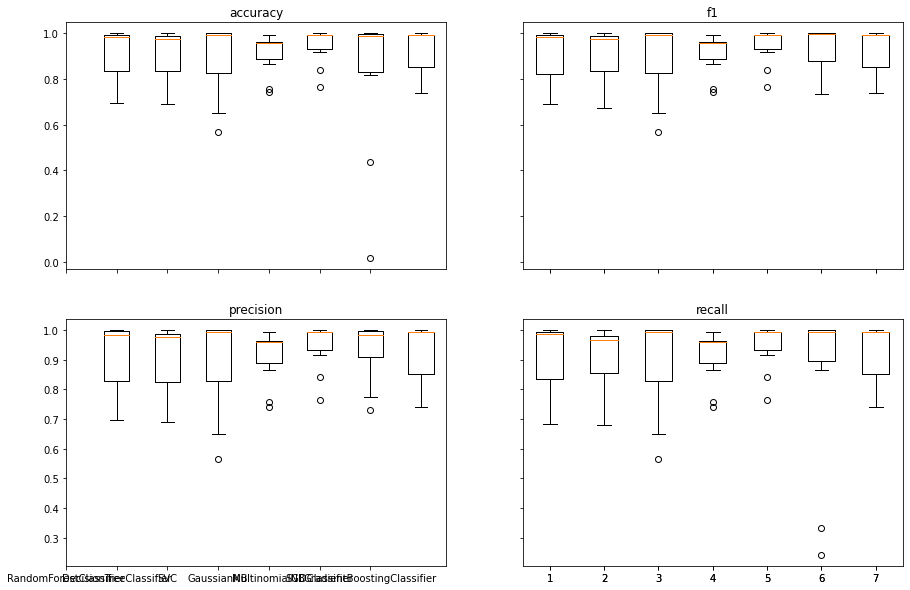

In [151]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
for idx, result in enumerate(all_results):
    a = ax[int(idx/2)][idx%2]
    a.boxplot(result["results"])
    a.set_title(result["scoring"])
# ax[0][0].set_yticks(range(len(all_results[3]["names"])))
# ax[0][0].set_yticklabels(all_results[3]["names"])
ax[0][0].set_xticks(range(len(all_results[3]["names"])))
ax[0][0].set_xticklabels(all_results[3]["names"], rotation=90)

In [8]:
loaded_model = pickle.load(
    open(
        "../model_training/trained_models/DecisionTreeClassifier_finalized_model.sav",
        "rb",
    )
)
loaded_model.score(X_test, y_test)

0.9531772575250836

In [30]:
v = pd.DataFrame([pd.Series(
    {
        "userFollowerCount": 433,
        "userFollowingCount": 238,
        "userBiographyLength": 0,
        "userHasProfilPic": True,        
        "userMediaCount": 33,
        "userIsPrivate": True,
        "usernameDigitCount": 0,
        "usernameLength": 10,
    }
)])
loaded_model.predict(v)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0])